<a href="https://colab.research.google.com/github/MAINHO-JO/4th_p_2team/blob/JJLEE/Helmet_Retinanet_r50_fpn_1x_ver2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Thu May 18 14:40:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 0. Pytorch 버전과 MMDetection 버전 변화
- 현재 Google Colab에 pytorch 2.0이 설치 (2023.4)
- MMDetection도 2.0에서 3.0으로 업그레이드 (2023.4)
- 그러나 MMDetection 3.0이 pytorch 2.0을 공식 지원하지 않음
- 따라서 pytorch 1.13+ CUDA 116 환경으로 코랩 커널 downgrade
- MMDetection도 2.x 브랜치로 설치할 예정

In [2]:
# pytorch 1.13+ CUDA 116 환경으로 Colab 커널 downgrade
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 686.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+

# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [3]:
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 5.2 MB/s eta 0:00:00


### Step 2. Install MMDetection from the source.

In [4]:
# mmdetection 2.x branch 로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36110, done.
remote: Counting objects: 100% (761/761), done.
remote: Compressing objects: 100% (403/403), done.
remote: Total 36110 (delta 390), reused 626 (delta 349), pack-reused 35349
Receiving objects: 100% (36110/36110), 52.12 MiB | 26.37 MiB/s, done.
Resolving deltas: 100% (25325/25325), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


### Step 3. Verification

In [5]:
import mmdet
print(mmdet.__version__)

2.28.2


/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [6]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 18.8 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [7]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'
result = inference_detector(model, 'demo/demo.jpg')
len(result)

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


80

# Train A Detector on A Customized Dataset
- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

In [8]:
import os
import glob
import shutil
import pandas as pd
import mmcv
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmcv import Config

# Helmet Data 다운

In [9]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
!kaggle datasets download -d andrewmvd/hard-hat-detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
100% 1.22G/1.22G [00:09<00:00, 136MB/s]
100% 1.22G/1.22G [00:09<00:00, 136MB/s]


In [10]:
!unzip -q /content/mmdetection/hard-hat-detection.zip -d hard-hat-detection

### BCCD Dataset의 디렉토리 구조 보기

In [11]:
# Check the directory structure of the Oxford Pet

# install tree first
!apt-get -q install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 0s (162 kB/s)
Selecting previously unselected package tree.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../tree_1.8.0-1_amd64.deb ...
Unpacking tree (1.8.0-1) ...
Setting up tree (1.8.0-1) ...
Processing triggers for man-db (2.9.1-1) ...


In [12]:
!tree ./hard-hat-detection/annotations

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
├── hard_hat_workers1001.xml
├── hard_hat_workers1002.xml
├── hard_hat_workers1003.xml
├── hard_hat_workers1004.xml
├── hard_hat_workers1005.xml
├── hard_hat_workers1006.xml
├── hard_hat_workers1007.xml
├── hard_hat_workers1008.xml
├── hard_hat_workers1009.xml
├── hard_hat_workers100.xml
├── hard_hat_workers1010.xml
├── hard_hat_workers1011.xml
├── hard_hat_workers1012.xml
├── hard_hat_workers1013.xml
├── hard_hat_workers1014.xml
├── hard_hat_workers1015.xml
├── hard_hat_workers1016.xml
├── hard_hat_workers1017.xml
├── hard_hat_workers1018.xml
├── hard_hat_workers1019.xml
├── hard_hat_workers101.xml
├── hard_hat_workers1020.xml
├── hard_hat_workers1021.xml
├── hard_hat_workers1022.xml
├── hard_hat_workers1023.xml
├── hard_hat_workers1024.xml
├── hard_hat_workers1025.xml
├── hard_hat_workers1026.xml
├── hard_hat_workers1027.xml
├── hard_hat_workers1028.xml
├── hard_hat_workers1029.xml
├── hard_hat_workers102.xml
├── hard_hat_workers1030.xml
├── hard_h

# 데이터 정리: train, valid, test

In [14]:
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path): 
      # os.walk: 시작 경로를 기준으로 하위 디렉토리를 재귀적으로 탐색하며, 각 디렉토리에서는 해당 디렉토리의 하위 파일들도 함께 반환합니다.
        count += len(files)
    return count

In [15]:
#Annotation 파일
path = './hard-hat-detection/annotations'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

#img 파일
path = './hard-hat-detection/images'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./hard-hat-detection/annotations: 5000
Total number of files in ./hard-hat-detection/images: 5000


In [16]:
%cd '/content/mmdetection/hard-hat-detection'

/content/mmdetection/hard-hat-detection


In [17]:
# train, valid, test 파일이 들어갈 디렉토리 만들기
!mkdir ImageSets

In [18]:
%cd '/content/mmdetection/'

/content/mmdetection


In [19]:
# images명을 test, valid, train set으로 나누기

import os
import random

# 이미지 폴더 경로
image_folder = './hard-hat-detection/images'

# 파일명을 저장할 텍스트 파일 경로
train_file = './hard-hat-detection/ImageSets/train.txt'
valid_file = './hard-hat-detection/ImageSets/valid.txt'
test_file = './hard-hat-detection/ImageSets/test.txt'

# 파일명에서 확장자를 제외하는 함수
def remove_extension(file_name):
    return os.path.splitext(file_name)[0]

# 이미지 폴더 내의 파일명 추출
file_names = []
for file_name in os.listdir(image_folder):
    if file_name.endswith('.png'):
        file_names.append(remove_extension(file_name))

# 파일명을 섞은 후 비율에 맞게 분할
random.shuffle(file_names)
total_count = len(file_names)
train_count = int(0.6 * total_count)  # 60% train
valid_count = int(0.2 * total_count)  # 20% validation
test_count = total_count - train_count - valid_count  # remaining for test

# 파일명을 각각의 파일에 저장
with open(train_file, 'w') as f:
    for file_name in file_names[:train_count]:
        f.write(file_name + '\n')

with open(valid_file, 'w') as f:
    for file_name in file_names[train_count:train_count+valid_count]:
        f.write(file_name + '\n')

with open(test_file, 'w') as f:
    for file_name in file_names[train_count+valid_count:]:
        f.write(file_name + '\n')

print('파일명이 성공적으로 저장되었습니다.')

파일명이 성공적으로 저장되었습니다.


##Json 파일 생성

In [20]:
# 텍스트 파일 생성: annotation tag 종류 확인
!grep -REoh '<name>.*</name>' ./hard-hat-detection/annotations | sort | uniq
# 텍스트 파일 생성: 생성
!grep -ERoh '<name>(.*)</name>' ./hard-hat-detection/annotations | sort | uniq | sed 's/<name>//g' | sed 's/<\/name>//g' > labels.txt

<name>head</name>
<name>helmet</name>
<name>person</name>


### MS-COCO 포맷으로 변환하기
- voc 포맷을 coco 포맷으로 변환하는 패키지
- https://github.com/yukkyo/voc2coco.git 의 How to use 참고

In [13]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 436 (delta 11), reused 19 (delta 6), pack-reused 409
Receiving objects: 100% (436/436), 216.32 KiB | 3.00 MiB/s, done.
Resolving deltas: 100% (387/387), done.


### 파일 지우기 ### Anno, datase_ids, 2개 text 파일

In [21]:
!rm -r /content/mmdetection/voc2coco/sample/Annotations

In [22]:
!rm -r /content/mmdetection/voc2coco/sample/dataset_ids

In [23]:
!mkdir /content/mmdetection/voc2coco/sample/Annotations

In [24]:
!mkdir /content/mmdetection/voc2coco/sample/dataset_ids

필요한 파일 복사

In [25]:
!cp /content/mmdetection/labels.txt /content/mmdetection/voc2coco/sample

In [26]:
%cd /content/mmdetection/voc2coco

/content/mmdetection/voc2coco


In [27]:
!python voc2coco.py --ann_dir ../hard-hat-detection/annotations \
--ann_ids ../hard-hat-detection/ImageSets/train.txt \
--labels /content/mmdetection/labels.txt \
--output ../hard-hat-detection/train.json \
--ext xml

!python voc2coco.py --ann_dir ../hard-hat-detection/annotations \
--ann_ids ../hard-hat-detection/ImageSets/valid.txt \
--labels /content/mmdetection/labels.txt \
--output ../hard-hat-detection/valid.json \
--ext xml

!python voc2coco.py --ann_dir ../hard-hat-detection/annotations \
--ann_ids ../hard-hat-detection/ImageSets/test.txt \
--labels /content/mmdetection/labels.txt \
--output ../hard-hat-detection/test.json \
--ext xml

Start converting !
100% 3000/3000 [00:00<00:00, 9094.05it/s]
Start converting !
100% 1000/1000 [00:00<00:00, 8260.42it/s]
Start converting !
100% 1000/1000 [00:00<00:00, 9211.25it/s]


In [28]:
# Annotations와 dataset ids 파일 복사해서 옮기는 방법

# 복사할 이미지 파일이 들어있는 두 폴더 경로
folder1 = '/content/mmdetection/hard-hat-detection/annotations'

# 복사할 이미지 파일의 대상 폴더 경로
target_folder = '/content/mmdetection/voc2coco/sample/Annotations'

# source_folder를 재귀적으로 순회하면서 이미지 파일들을 복사
for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('.xml')): # 파일명을 모두 소문자로 변환해 대소문자 구분 없이 검색할수 있도록 한다.
            annotation_file = os.path.join(root, file)
            target_file = os.path.join(target_folder, file)
            shutil.copy(annotation_file, target_file)

In [29]:
# Annotation 파일
path = '/content/mmdetection/voc2coco/sample/Annotations'
count = count_files(path)
print(f'Total number of files in {path}: {count}') # 5000

Total number of files in /content/mmdetection/voc2coco/sample/Annotations: 5000


In [30]:
# Annotations와 dataset ids 파일 복사해서 옮기는 방법

# 복사할 이미지 파일이 들어있는 두 폴더 경로
folder1 = '/content/mmdetection/hard-hat-detection/ImageSets'

# 복사할 이미지 파일의 대상 폴더 경로
target_folder = '/content/mmdetection/voc2coco/sample/dataset_ids'

# source_folder를 재귀적으로 순회하면서 이미지 파일들을 복사
for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('.txt')): # 파일명을 모두 소문자로 변환해 대소문자 구분 없이 검색할수 있도록 한다.
            text_file = os.path.join(root, file)
            target_file = os.path.join(target_folder, file)
            shutil.copy(text_file, target_file)

In [31]:
# Text 파일
path = '/content/mmdetection/voc2coco/sample/dataset_ids'
count = count_files(path)
print(f'Total number of files in {path}: {count}') # 3

Total number of files in /content/mmdetection/voc2coco/sample/dataset_ids: 3


In [32]:
!cat ../hard-hat-detection/train.json

{"images": [{"file_name": "hard_hat_workers908.png", "height": 416, "width": 416, "id": "hard_hat_workers908"}, {"file_name": "hard_hat_workers2619.png", "height": 415, "width": 416, "id": "hard_hat_workers2619"}, {"file_name": "hard_hat_workers1980.png", "height": 416, "width": 415, "id": "hard_hat_workers1980"}, {"file_name": "hard_hat_workers3151.png", "height": 416, "width": 416, "id": "hard_hat_workers3151"}, {"file_name": "hard_hat_workers4772.png", "height": 416, "width": 416, "id": "hard_hat_workers4772"}, {"file_name": "hard_hat_workers258.png", "height": 415, "width": 416, "id": "hard_hat_workers258"}, {"file_name": "hard_hat_workers4537.png", "height": 415, "width": 416, "id": "hard_hat_workers4537"}, {"file_name": "hard_hat_workers792.png", "height": 416, "width": 416, "id": "hard_hat_workers792"}, {"file_name": "hard_hat_workers3760.png", "height": 416, "width": 416, "id": "hard_hat_workers3760"}, {"file_name": "hard_hat_workers620.png", "height": 416, "width": 416, "id": 

In [33]:
# 온라인 파서 이용 http://json.parser.online.fr/
# 또는 jq 유틸리티 설치
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig5
The following NEW packages will be installed:
  jq libjq1 libonig5
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 313 kB of archives.
After this operation, 1,062 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libonig5 amd64 6.9.4-1 [142 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libjq1 amd64 1.6-1ubuntu0.20.04.1 [121 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 jq amd64 1.6-1ubuntu0.20.04.1 [50.2 kB]
Fetched 313 kB in 1s (349 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline

In [34]:
!jq . ../hard-hat-detection/train.json > output.json  # jq로 파일을 읽으면 한줄이 여러줄로 정리되어 나온다.
#!cat ../BCCD_Dataset/BCCD/train.json 
!tail -100 output.json

      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "hard_hat_workers2374",
      "id": 15078
    },
    {
      "area": 864,
      "iscrowd": 0,
      "bbox": [
        373,
        192,
        27,
        32
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "hard_hat_workers2374",
      "id": 15079
    },
    {
      "area": 6776,
      "iscrowd": 0,
      "bbox": [
        128,
        124,
        77,
        88
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "hard_hat_workers4966",
      "id": 15080
    },
    {
      "area": 2496,
      "iscrowd": 0,
      "bbox": [
        102,
        139,
        48,
        52
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "hard_hat_workers525",
      "id": 15081
    },
    {
      "area": 1722,
      "iscrowd": 0,
      "bbox": [
        69,
        127,
        41,

### 이미지와 레이블 보기

In [35]:
# voc2coco 디렉토리에서 상위로 이동하기 (mmdetection 폴더)
%cd ../

/content/mmdetection


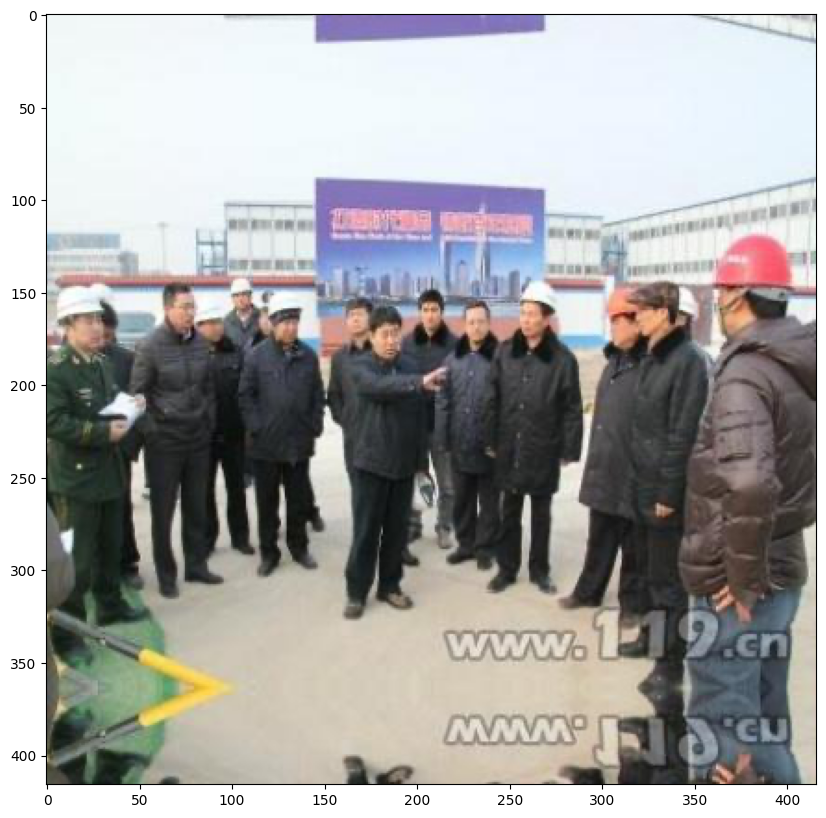

In [36]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('./hard-hat-detection/images/hard_hat_workers0.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [37]:
# Check the label of a single image
!cat ./hard-hat-detection/annotations/hard_hat_workers0.xml


<annotation>
    <folder>images</folder>
    <filename>hard_hat_workers0.png</filename>
    <size>
        <width>416</width>
        <height>416</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>357</xmin>
            <ymin>116</ymin>
            <xmax>404</xmax>
            <ymax>175</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>4</xmin>
            <ymin>146</ymin>
            <xmax>39</xmax>
            <ymax>184</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
  

[{'class_name': 'helmet', 'bndbox_coor': (357, 116, 404, 175)}, {'class_name': 'helmet', 'bndbox_coor': (4, 146, 39, 184)}, {'class_name': 'helmet', 'bndbox_coor': (253, 139, 275, 177)}, {'class_name': 'helmet', 'bndbox_coor': (300, 145, 323, 181)}, {'class_name': 'helmet', 'bndbox_coor': (116, 151, 138, 180)}, {'class_name': 'helmet', 'bndbox_coor': (80, 151, 100, 180)}, {'class_name': 'head', 'bndbox_coor': (62, 144, 83, 172)}, {'class_name': 'head', 'bndbox_coor': (322, 141, 345, 178)}, {'class_name': 'head', 'bndbox_coor': (175, 156, 194, 186)}, {'class_name': 'head', 'bndbox_coor': (222, 151, 240, 182)}, {'class_name': 'head', 'bndbox_coor': (200, 146, 216, 173)}, {'class_name': 'helmet', 'bndbox_coor': (98, 140, 112, 160)}, {'class_name': 'head', 'bndbox_coor': (157, 150, 175, 177)}]


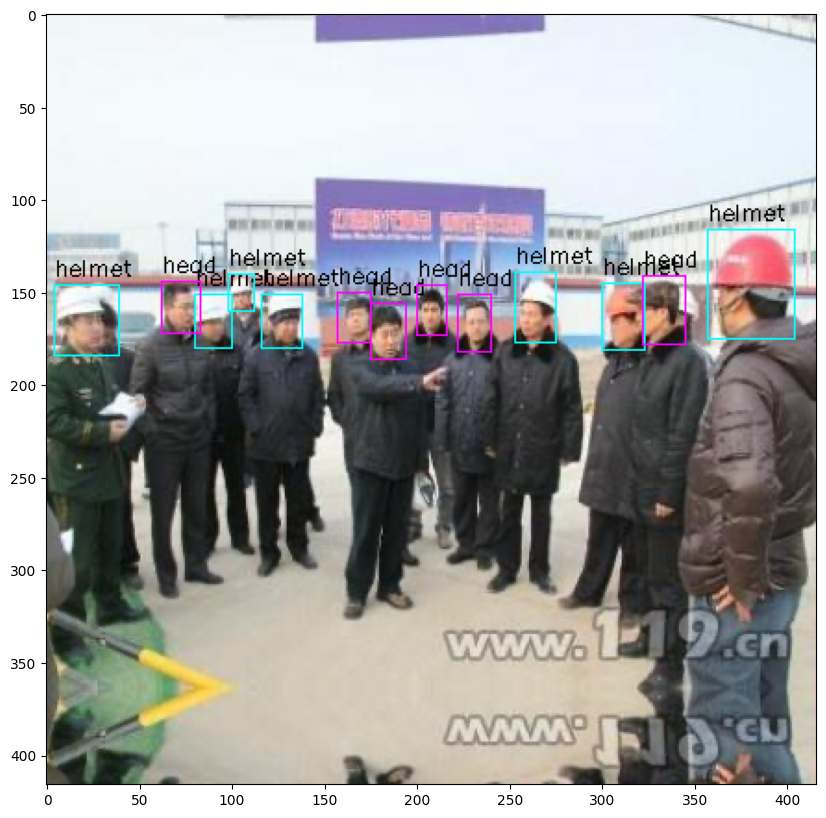

In [38]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
img_dir = "./hard-hat-detection/images"
xml_file = "./hard-hat-detection/annotations/hard_hat_workers0.xml"

class2color = {'helmet':(255, 255, 0), 'head':(255, 0, 255), 'person':(0, 255, 255)}

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('object')
object_list = []

for obj in objects:
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = obj.find("name").text  
  
  cv2.rectangle(dst, (x1, y1), (x2, y2), color=class2color[class_name], thickness=1)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), thickness=1 )

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

### BCCD Dataset을 COCO Format으로 변환하기

- github의 mmdet/datasets 디렉토리 아래 [coco.py](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/datasets/coco.py)에 CoCoDataset 클래스 정의
- **CocoDataset을 상속받는 경우에는 별다른 수정사항없이 현재 데이터셋의 클래스만 변경해주면됨**

In [39]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True) 
class HelmetDataset(CocoDataset):
    CLASSES = ('helmet', 'head', 'person')

### Config 파일 수정하기
- 아래 주어진 config 파일은 COCO dataset 기준으로 ReninaNet 을 훈련 시키는 설정이므로 BCCD Dataset 에 맞게 수정해야 함

In [40]:
from mmcv import Config
cfg = Config.fromfile('./configs/retinanet/retinanet_r50_fpn_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='RetinaNet',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        start_level=1,
        add_extra_convs='on_input',
        num_outs=5),
    bbox_head=dict(
        type='RetinaHead',
        num_classes=80,
        in_channels=256,
        stacked_convs=4,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            octave_base_scale=4,
            scales_per_octave=3,
            ratios=[0.5, 1.0, 2.0],
            strides=[8, 16, 32, 64, 128]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_mean

### Pretrained 모델 다운로드하기

In [41]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth \
      -O checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth

--2023-05-18 14:58:40--  https://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.25.82.210, 8.25.82.214, 8.25.82.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.25.82.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152149505 (145M) [application/octet-stream]
Saving to: ‘checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth’

checkpoints/retinan 100%[===================>] 145.10M  20.4MB/s    in 7.2s    

2023-05-18 14:58:49 (20.1 MB/s) - ‘checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth’ saved [152149505/152149505]



In [ ]:
# 학습 수행후 모델 checkpoint 저장할 공간 연결
# !mkdir /content/drive/MyDrive/bccd_log

In [55]:
from mmdet.apis import set_random_seed

# first error: /content/mmdetection/hard-hat-detection/Helmet_train/hard_hat_workers3635.png'

# Modify dataset type and path
cfg.dataset_type = 'HelmetDataset'
cfg.data_root = '/content/mmdetection/hard-hat-detection'

cfg.data.test.type = 'HelmetDataset'
cfg.data.test.data_root = '/content/mmdetection/hard-hat-detection'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'images'

cfg.data.train.type = 'HelmetDataset'
cfg.data.train.data_root = '/content/mmdetection/hard-hat-detection'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'HelmetDataset'
cfg.data.val.data_root = '/content/mmdetection/hard-hat-detection'
cfg.data.val.ann_file = 'valid.json'
cfg.data.val.img_prefix = 'images'

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 3
#cfg.model.roi_head.mask_head.num_classes = 6

# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth'

# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive/HELMET Dataset/helmet'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.01 / 8
# cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# max epochs 12 
# cfg.runner.max_epochs = 12 # 기본값 변경시에만 설정

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 2 
# cfg.data.samples_per_gpu = 2 # 기본값 변경시에만설정

# Change the evaluation metric since we use customized dataset.
# note.
# detection evaluation에 map를 설정하면 iou가 0.5 일때만
# cocodata로 detection 할 때는 bbox를 설정해야 다양한 iou 기준 출력
# cocodata로 segmentation 할때는 bbox, segm을 지정
# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
#cfg.evaluation.metric = ['bbox', 'segm'] # segm이 없으므로 segm을 제외하고 실행 이 파일은 segm을 포함하고 돌려서 결과에서 에러가 발생함
cfg.evaluation.metric = ['bbox']

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 10
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 6

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='RetinaNet',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        start_level=1,
        add_extra_convs='on_input',
        num_outs=5),
    bbox_head=dict(
        type='RetinaHead',
        num_classes=3,
        in_channels=256,
        stacked_convs=4,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            octave_base_scale=4,
            scales_per_octave=3,
            ratios=[0.5, 1.0, 2.0],
            strides=[8, 16, 32, 64, 128]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means

### Config에서 설정한 BCCD Dataset 적용
- build_dataset() 가 호출될 때 MMDetection Framework에서 BCCDDataset 클래스 객체를 생성
- load_annotations() 함수가 호출될 때 self.ann_file, self.data_root, self.img_prefix 값이 Config에서 설정한 파일들로 적용되어 있음

In [56]:
from mmdet.datasets import build_dataset

# Build dataset
train_dataset, test_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.test)]

loading annotations into memory...
Done (t=10.51s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [57]:
train_dataset


HelmetDataset Train dataset with number of images 3000, and instance counts: 
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+
| category   | count | category | count | category   | count | category | count | category | count |
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+
|            |       |          |       |            |       |          |       |          |       |
| 0 [helmet] | 3379  | 1 [head] | 11266 | 2 [person] | 438   |          |       |          |       |
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+

### Config에서 설정한 모델 적용

In [58]:
from mmdet.models import build_detector

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = train_dataset.CLASSES

### 학습 수행

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))
train_detector(model, train_dataset, cfg, distributed=False, validate=True) 

2023-05-18 15:13:56,973 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-18 15:13:57,002 - mmdet - INFO - load checkpoint from local path: checkpoints/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
2023-05-18 15:13:57,134 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([27, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([27]).
2023-05-18 15:13:57,137 - mmdet - INFO - Start running, host: root@abae42f980d5, work_dir: /content/drive/MyDrive/HELMET Dataset/helmet
2023-05-18 15:13:57,139 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                  

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2023-05-18 15:14:00,869 - mmdet - INFO - Epoch [1][10/1501]	lr: 2.373e-05, eta: 1:50:24, time: 0.368, data_time: 0.229, memory: 2152, loss_cls: 221.2503, loss_bbox: 0.5079, loss: 221.7582
2023-05-18 15:14:02,180 - mmdet - INFO - Epoch [1][20/1501]	lr: 4.870e-05, eta: 1:14:51, time: 0.131, data_time: 0.012, memory: 2152, loss_cls: 2.9362, loss_bbox: 0.4960, loss: 3.4323
2023-05-18 15:14:03,524 - mmdet - INFO - Epoch [1][30/1501]	lr: 7.368e-05, eta: 1:03:18, time: 0.134, data_time: 0.011, memory: 2152, loss_cls: 3.5975, loss_bbox: 0.4896, loss: 4.0871
2023-05-18 15:14:04,859 - mmdet - INFO - Epoch [1][40/1501]	lr: 9.865e-05, eta: 0:57:25, time: 0.133, data_time: 0.011, memory: 2158, loss_cls: 1.9418, loss_bbox: 0.4534, loss: 2.3952
2023-05-18 15:14:06,204 - mmdet - INFO - Epoch [1][50/1501]	lr: 1.236e-04, eta: 0:53:59, time: 0.135, data_time: 0.011, memory: 2158, loss_cls: 1.0605, loss_bbox: 0.4064, loss: 1.4668
2023-05-18 15:14:07,546 - mmdet - INFO - Epoch [1][60/1501]	lr: 1.486e-04, e

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1000/1000, 23.9 task/s, elapsed: 42s, ETA:     0s

2023-05-18 15:47:59,176 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.06s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.66s).
Accumulating evaluation results...


2023-05-18 15:48:05,656 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.381
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.615
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.423
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.322
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.453
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.488
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.550
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.550
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.407
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.583
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.19s).


2023-05-18 15:48:09,268 - mmdet - INFO - Epoch [11][10/1501]	lr: 1.250e-04, eta: 0:06:38, time: 0.352, data_time: 0.228, memory: 2303, loss_cls: 0.0775, loss_bbox: 0.1492, loss: 0.2266
2023-05-18 15:48:10,571 - mmdet - INFO - Epoch [11][20/1501]	lr: 1.250e-04, eta: 0:06:36, time: 0.130, data_time: 0.010, memory: 2303, loss_cls: 0.0420, loss_bbox: 0.1377, loss: 0.1797
2023-05-18 15:48:11,870 - mmdet - INFO - Epoch [11][30/1501]	lr: 1.250e-04, eta: 0:06:35, time: 0.130, data_time: 0.010, memory: 2303, loss_cls: 0.0512, loss_bbox: 0.1462, loss: 0.1974
2023-05-18 15:48:13,167 - mmdet - INFO - Epoch [11][40/1501]	lr: 1.250e-04, eta: 0:06:34, time: 0.130, data_time: 0.010, memory: 2303, loss_cls: 0.0515, loss_bbox: 0.1484, loss: 0.1999
2023-05-18 15:48:14,495 - mmdet - INFO - Epoch [11][50/1501]	lr: 1.250e-04, eta: 0:06:32, time: 0.133, data_time: 0.011, memory: 2303, loss_cls: 0.0380, loss_bbox: 0.1557, loss: 0.1937
2023-05-18 15:48:15,840 - mmdet - INFO - Epoch [11][60/1501]	lr: 1.250e-04,

### 로그 확인하기

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir /content/drive/MyDrive/bccd_log

### 학습된 모델로 예측하기

**이미지 한장 예측**

In [60]:
from mmdet.apis import show_result_pyplot

img = mmcv.imread('BCCD_Dataset/BCCD/JPEGImages/BloodImage_00004.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.4)

FileNotFoundError: ignored

load checkpoint from local path: /content/drive/MyDrive/HELMET Dataset/helmet/epoch_12.pth


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


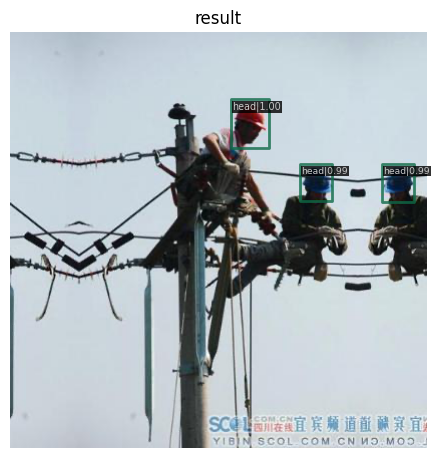

In [65]:
from mmdet.apis import show_result_pyplot

checkpoint_file = '/content/drive/MyDrive/HELMET Dataset/helmet/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
img = mmcv.imread('/content/mmdetection/hard-hat-detection/images/hard_hat_workers10.png') # BGR Image 사용 
#model_ckpt.cfg = cfg

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.4)

**이미지 여러장 예측**

In [ ]:
import pandas as pd
pd.read_csv('./BCC_Dataset/BCCD/imageSets/Main/test.txt', header = None, name =['image_name'])
test_df.head()

TypeError: ignored

In [ ]:
test_img_paths =  './BCCD_Dataset/BCCD/JPEGImages/' + test_df['image_name'] + '.jpg'

NameError: ignored

In [ ]:
teest_imgs = [mmcv.imread(img_path) for img_path in test_img_paths.values]

NameError: ignored

In [ ]:
for i in range(10):
  result = inference_detector(model_ckpt, test_imgs[i])
  show_result_pyplot(model_ckpt, test_imgs[i], )

### 모델 평가

In [ ]:
# cfg.dump('./configs/faster_rcnn/faster_rcnn_r50_fpn_1x_bccd.py')
# from mmdet.datasets import build_dataset
# test_dataset = build_dataset(cfg.data.test)
# !python tools/test.py configs/faster_rcnn/faster_rcnn_r50_fpn_1x_bccd.py ../drive/MyDrive/bccd_log/epoch_12.pth --eval bbox

In [61]:
from mmdet.datasets import build_dataloader, build_dataset

data_loader = build_dataloader(
        test_dataset,
        samples_per_gpu=1, #cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

{'img_metas': [DataContainer([[{'filename': '/content/mmdetection/hard-hat-detection/images/hard_hat_workers4414.png', 'ori_filename': 'hard_hat_workers4414.png', 'ori_shape': (416, 416, 3), 'img_shape': (800, 800, 3), 'pad_shape': (800, 800, 3), 'scale_factor': array([1.9230769, 1.9230769, 1.9230769, 1.9230769], dtype=float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}]])],
 'img': [tensor([[[[ 1.4440,  1.4098,  1.3242,  ...,  2.2489,  2.2489,  2.2489],
            [ 1.4098,  1.3755,  1.3242,  ...,  2.2489,  2.2489,  2.2489],
            [ 1.3584,  1.3413,  1.2899,  ...,  2.2489,  2.2489,  2.2489],
            ...,
            [-0.3712, -0.3541, -0.3369,  ...,  0.4508,  0.5878,  0.6563],
            [-0.1657, -0.1657, -0.1486,  ...,  0.6734,  0.8276,  0.9132],
            [-0.0458, -0.0458, -0.0629,  ...,  0.7933,  0.9646,  1.0673]],
  
     

In [62]:
!mkdir show_test_output

In [66]:
from mmdet.apis import single_gpu_test
from mmdet.utils import build_dp

# 위에서 만든 /content/show_test_output 디렉토리에 예측 이미지가 저장됨. 
model_ckpt = build_dp(model_ckpt, cfg.device, device_ids=cfg.gpu_ids)
results = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.3)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1000/1000, 7.4 task/s, elapsed: 136s, ETA:     0s

In [67]:
metric = test_dataset.evaluate(results, metric='bbox')
print(metric)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.61s).
Accumulating evaluation results...
DONE (t=1.02s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.388
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.625
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.434
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.327
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.462
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.447
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.599
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.599
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.599
 Average Recall     (AR) @[ IoU=0.50:0.95